## Final Project Submission

Please fill out:
* Student name: HELLEN DIANA NJERI MACHARIA
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: MARYANNE MWIKALI
* Blog post URL:


# AVIATION DATA ANALYSIS

## BUSINESS UNDERSTANDING

### INTRODUCTION

As a strategic plan to diversify its portfolio, our company plans to enter the aviation industry by purchasing and operating airplanes for commercial and private enterprises. 
However, the company currently lacks knowledge regarding the potential risks associated with different types of aircraft.
This project aims to provide a data-driven evaluation of various aircrafts to guide the company in making informed purchasing decisions.



### STAKEHOLDERS

The primary stakeholders are:

. Head of Aviation Division

  Responsible to select which aircraft to purchase based on the findings of the project for the best interest of the company.

. Executive management Team
  
  Ensures that the project aligns with the company's risk standards and is financially viable.

. Operation managers. 
  
  Implement the insights to plan for staffing,logistics and maintenance.

  ### The stakeholders will use the project findings to:

  . Select the aircraft with low accident rates and strong safety records.
  
  . Estimate the maintenance costs associated with the aircraft selected.
  


## Import the relevant libraries

In this cell we import the relevant libraries needed for data manipulation and visualization



In [243]:
# Run this cell to import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data into a data frame called 'Aviation_df'

In this repository under the file path 'data\Aviation_Data.csv' there is a CSV file containing information about Aviation data.

We will load the csv file into a dataframe.

In [244]:
# load the data
file_path = 'data\Aviation_Data.csv'
Aviation_df=pd.read_csv('data\Aviation_Data.csv')
Aviation_df.head() # Display the first 5 rows of the dataframe

c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Create a copy of the dataframe to ensure you can make changes to the data without altering the original dataset

In [245]:
# create a copy of the dataframe
Aviation_df_cleaned = Aviation_df.copy()

## Inspect the data

In this section we are going to understand the data structure by inspecting :
- Shape
- Column names
- Data Types
- Duplicates
- Missing Values
- Descriptive statistics
- Sample row of the data frame

In [246]:
# check the number of rows and columns in the dataframe
Aviation_df_cleaned.shape

(90348, 31)

In [247]:
# list of the columns in the dataframe
Aviation_df_cleaned.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [248]:
# check the data types of the columns in the dataframe
Aviation_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [249]:
# check for missing values in the dataframe
Aviation_df_cleaned.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [250]:
# check for duplicates in the dataframe
duplicate_rows = Aviation_df_cleaned.duplicated().sum() # Display the number of duplicate rows in the dataframe
duplicate_rows

1390

In [251]:
# Display summary statistics of all columns in the dataframe
Aviation_df_cleaned.describe() 

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [252]:
# view a sample row of the dataframe
Aviation_df_cleaned.sample() 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
28582,20001212X17726,Accident,SEA91LA192,1991-07-19,"LITTLE ROCK, WA",United States,NaN,NaN,NaN,EVERGREEN GUN CLUB,...,Personal,NaN,0.0,0.0,0.0,5.0,UNK,Go-around,Probable Cause,28-09-1992


# DATA UNDERSTANDING

## DATA SOURCES
The dataset used for this analysis provides a historical record of aviation accidents and safety incidences recorded from various regulatory bodies.

The dataset contains detailed information on aircraft accidents,injuries and aircraft types that provide an ideal understanding of the safety profiles of various aircrafts which is in line with our project's objective to identify the *lowest risk aircraft* for purchase.

### DATASET SIZE AND SHAPE

The dataset contains **90,348 rows** and **31 columns**. 

Each row represents an individual aviation accident, while the columns contain various features such as the **aircraft make**, **model**, **number of injuries**, **weather conditions**.

The dataset’s affirms that we have reasonable amount of data useful for assessing trends and risks associated with different aircraft types.

However, some columns might not be relevant to our analysis, and we may choose to drop those in the **Data Preparation** phase.

### Key Features
The following columns are key to assessing the aircraft's safety and risk:

- Total.Fatal.Injuries: The number of fatalities in the accident.

- Total.Serious.Injuries: The number of serious injuries in the accident.

- Total.Minor.Injuries: The number of minor injuries in the accident.

- Aircraft.damage: The extent of damage to the aircraft (e.g., Substantial, Destroyed).

- Make: The manufacturer of the aircraft.

- Model: The specific model of the aircraft.

- Engine.Type: The type of engine (e.g., Turbofan, Piston).

- Broad.Phase.of.flight: The different stages during which the aviation accident occured(e.g cruise,landing)

- Weather.Condition: The weather conditions during the accident.

### Missing Values
There are some missing values in the various columns. These missing values will be addressed in the Data Preparation phase, possibly through imputation or by dropping rows with critical missing data.

### Descriptive Statistics
The dataset provides various descriptive statistics such as the mean and standard deviation for numerical data, which can help us understand the severity of accidents related to different aircraft.

Key Statistics Breakdown:

1. Number.of.Engines:
    Mean: 1.15 engines per aircraft,indicating that most aircrafts in the dataset have either 1 or 2 engines
    Min: 0 engines (likely an error or a missing value; could indicate data entry issues).
    Max: 8 engines (likely large aircraft or military aircraft).

Interpretation: The majority of aircraft are likely to be smaller commercial or private aircraft with 1 or 2 engines, which is important for evaluating risk as engine count may correlate with reliability and risk.

2. Total.Fatal.Injuries:
    Mean: 0.65 fatalities per incident, indicating that, on average, accidents involve less than one fatality.
    Std: 5.49 (large variability). Some accidents involve a very high number of fatalities, which indicates that some aircraft models may have a high risk of fatal incidents.
    Min: 0 fatalities (some accidents had no fatalities).
    Max: 349 fatalities (extremely high number, likely due to large commercial aircraft crashes or high-impact accidents).

Interpretation: Aircraft models with a higher number of fatalities should be considered higher-risk for the company.

3. Total.Serious.Injuries:
    Mean: 0.28 serious injuries per incident, suggesting that most accidents result in minor or no serious injuries.
    Std: 1.54 (again, large variability), indicating that while most accidents cause few serious injuries, some accidents cause many.
    Min: 0 serious injuries (some accidents had no serious injuries).
    Max: 161 serious injuries (indicating major incidents with severe consequences).

Interpretation: Serious injuries are an important factor in assessing risk, with aircraft involved in incidents causing more serious injuries being higher risk.

4. Total.Minor.Injuries:
    Mean: 0.36 minor injuries per incident, suggesting that minor injuries are somewhat common in accidents, though they are not the most severe.
    Std: 2.24 (indicating significant variability).
    Min: 0 minor injuries (some accidents had no minor injuries).
    Max: 380 minor injuries (again, showing some very severe accidents with a high number of minor injuries).

Interpretation: Minor injuries might not be as severe as fatal or serious injuries, but frequent occurrences can still indicate riskier aircraft types.

5. Total.Uninjured:
    Mean: 5.33 people uninjured per accident, indicating that the majority of passengers are often uninjured in an accident.
    Std: 27.91 (very large variability), showing that in some accidents, all passengers may be uninjured, while in others, the number may be much lower.
    Min: 0 uninjured (indicating some accidents with no survivors).
    Max: 699 uninjured (again, likely a major accident involving a large aircraft or multiple passengers).

Interpretation: Higher numbers of uninjured individuals in an accident typically point to less risky accidents, though extreme cases may suggest safety issues with certain aircraft types.

### Limitations
While this dataset is highly useful, there are a few limitations that must be considered:

* Missing or Incomplete Data: Some entries might have missing values, particularly for features like Total.Fatal.Injuries or Aircraft.damage. Missing data can skew the analysis and may need imputation or careful handling.

* Bias in Reporting: The dataset may over-represent certain aircraft manufacturers or countries, leading to potential bias in the findings. Not all accidents are equally reported across regions.

* Data Granularity: Some features may be too generalized (e.g., Weather.Condition or Purpose.of.flight), making it difficult to discern more specific risk factors tied to certain aircraft models or operational environments.

* Inconsistent Definitions: Differences in how accidents are classified and reported across regions or agencies can lead to inconsistencies in the data.

* Time-Based Trends: Over time, improvements in technology and safety measures may not be fully reflected, meaning older aircraft models might seem riskier than they actually are in contemporary contexts..

# DATA PREPARATION


## Drop unwanted columns


In [253]:
# list of the columns to be dropped
columns_to_drop = ['Accident.Number', 'Investigation.Type', 'Registration.Number',
    'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Report.Status',
    'Publication.Date', 'Air.carrier','FAR.Description','Location','Country'
]


In [254]:
# drop the columns from the dataframe
Aviation_df_cleaned= Aviation_df_cleaned.drop(columns=columns_to_drop)


In [255]:
Aviation_df_cleaned.info() # Display the information of the cleaned dataframe
Aviation_df_cleaned.shape # Display the shape of the cleaned dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Injury.Severity         87889 non-null  object 
 3   Aircraft.damage         85695 non-null  object 
 4   Aircraft.Category       32287 non-null  object 
 5   Make                    88826 non-null  object 
 6   Model                   88797 non-null  object 
 7   Amateur.Built           88787 non-null  object 
 8   Number.of.Engines       82805 non-null  float64
 9   Engine.Type             81812 non-null  object 
 10  Schedule                12582 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

(90348, 18)

In [256]:
# check for missing data in the cleaned dataframe
missing_values_cleaned = Aviation_df_cleaned.isnull().sum()
missing_values_cleaned

Event.Id                   1459
Event.Date                 1459
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
Schedule                  77766
Purpose.of.flight          7651
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
dtype: int64

## Handling missing Data

In [257]:
# Aircraft.Category
# Check the distribution of the 'Aircraft.Category' column
Aviation_df_cleaned['Aircraft.Category'].value_counts()

# Fill the missing values with 'Unknown'
Aviation_df_cleaned['Aircraft.Category'].fillna('Unknown')

0         Unknown
1         Unknown
2         Unknown
3         Unknown
4         Unknown
           ...   
90343     Unknown
90344     Unknown
90345    Airplane
90346     Unknown
90347     Unknown
Name: Aircraft.Category, Length: 90348, dtype: object

This shows that the most common category in the 'Aircraft Category' column is 'Aeroplane'

In [258]:
# drop the rows with missing values in the 'Broad.phase.of.flight' column
Aviation_df_cleaned = Aviation_df_cleaned.dropna(subset=['Broad.phase.of.flight'])

In [259]:
# fill the injury columns with 0
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for column in injury_columns:
    Aviation_df_cleaned[column] = Aviation_df_cleaned[column].fillna(0)

In [260]:
# FILL 'Number.of.Engine' missing values with 1
Aviation_df_cleaned['Number.of.Engines'] = Aviation_df_cleaned['Number.of.Engines'].fillna(1) 

In [261]:
# fill  'Engine.Type' missing values with 'mode of the column'
Aviation_df_cleaned['Engine.Type'] = Aviation_df_cleaned['Engine.Type'].fillna(Aviation_df_cleaned['Engine.Type'].mode()[0]) 


In [262]:
# fill the missing values in the 'weather condition' column with the mode of the column
Aviation_df_cleaned['Weather.Condition'] = Aviation_df_cleaned['Weather.Condition'].fillna(Aviation_df_cleaned['Weather.Condition'].mode()[0]) 

In [263]:
# fill the missing values in 'aircraft damage' column with the mode of the column
Aviation_df_cleaned['Aircraft.damage'] = Aviation_df_cleaned['Aircraft.damage'].fillna(Aviation_df_cleaned['Aircraft.damage'].mode()[0])

In [264]:
# check the unique values in 'injury severity' column
Aviation_df_cleaned['Injury.Severity'].value_counts() # Display the value counts of the 'Injury.Severity' column
# fill the missing data in 'injury severity' column with the mode of the column
Aviation_df_cleaned['Injury.Severity'] = Aviation_df_cleaned['Injury.Severity'].fillna(Aviation_df_cleaned['Injury.Severity'].mode()[0])

In [265]:
# fill the missing values in the 'Model' columns with 'Unknown'
Aviation_df_cleaned['Model'] = Aviation_df_cleaned['Model'].fillna('Unknown') 


In [266]:
#make column
Aviation_df_cleaned['Make']= Aviation_df_cleaned['Make'].fillna('Unknown')

In [267]:
# Extract the year from the 'Event.Date' column and create a new column 'Year'
Aviation_df_cleaned['Year'] = pd.to_datetime(Aviation_df_cleaned['Event.Date'], errors='coerce').dt.year

In [268]:
# Delete records from 2000 and before
Aviation_df_cleaned = Aviation_df_cleaned[Aviation_df_cleaned['Year'] > 2000]

In [269]:
 # Display the columns of the cleaned dataframe
Aviation_df_cleaned.columns

Index(['Event.Id', 'Event.Date', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Schedule', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Year'],
      dtype='object')

In [270]:
# drop the missing rows in the 'Aircraft.Category'
Aviation_df_cleaned['Aircraft.Category'] = Aviation_df_cleaned['Aircraft.Category'].dropna()

In [271]:
#Drop the rows with mising values in the 'purpose of flight' column
Aviation_df_cleaned = Aviation_df_cleaned.dropna(subset=['Purpose.of.flight'])

In [272]:
# check for missing values in the cleaned dataframe
missing_values_cleaned = Aviation_df_cleaned.isnull().sum()
missing_values_cleaned

Event.Id                      0
Event.Date                    0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category          8422
Make                          0
Model                         0
Amateur.Built                15
Number.of.Engines             0
Engine.Type                   0
Schedule                  11875
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Year                          0
dtype: int64

In [273]:
#shape of the cleaned dataframe
Aviation_df_cleaned.shape

(11884, 19)

# DATA ANALYSIS AND VISUALIZATION

* Identify which aircraft categories have the most accidents and which have the least.
* Calculate the average number of fatalities for each aircraft make.
* Identify which engine linked to the highest crash accidents

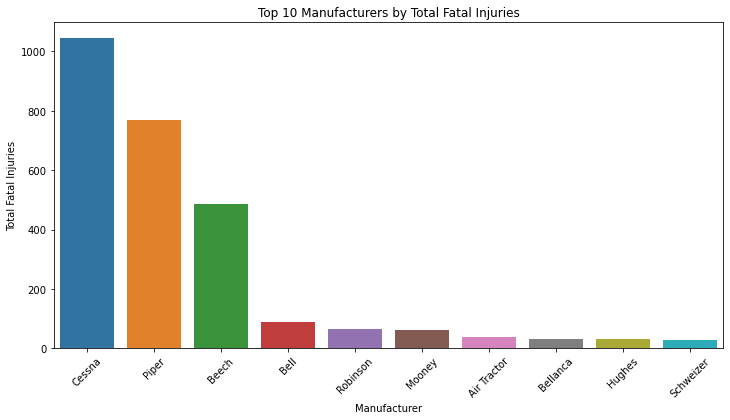

In [274]:
# fatalities by manufacturer
fatalities_by_manufacturer = Aviation_df_cleaned.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index()

# top 10 manufacturers
Top_10_manufacturers = Aviation_df_cleaned['Make'].value_counts().head(10).index.tolist()
# plot the fatalities by manufacturer bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=Top_10_manufacturers, y='Total.Fatal.Injuries', data=fatalities_by_manufacturer.sort_values(by='Total.Fatal.Injuries', ascending=False).head(10))
plt.title('Top 10 Manufacturers by Total Fatal Injuries')
plt.xlabel('Manufacturer')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()

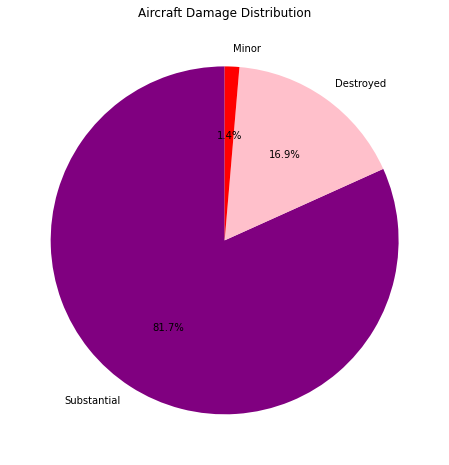

In [275]:
# Pie Chart of Aircraft Damage
plt.figure(figsize=(8, 8))
Aviation_df_cleaned['Aircraft.damage'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['purple','pink','red'])
plt.title('Aircraft Damage Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

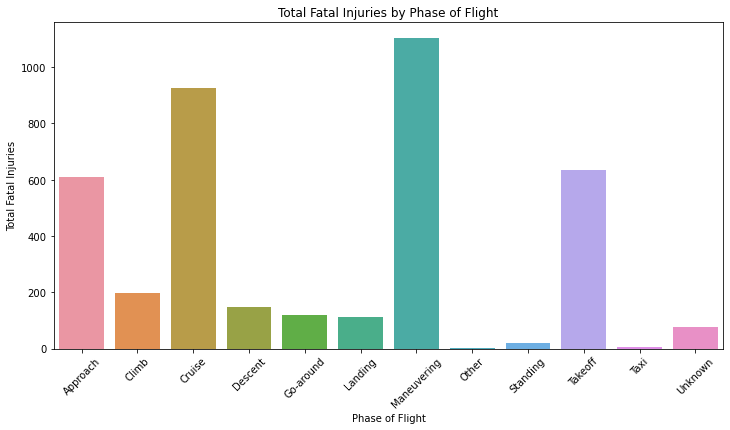

In [276]:
# injury severity by phase of flight
injuries_by_phase = Aviation_df_cleaned.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].sum()

# plot the injuries by phase of flight bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=injuries_by_phase.index, y='Total.Fatal.Injuries', data=injuries_by_phase.reset_index())
plt.title('Total Fatal Injuries by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()

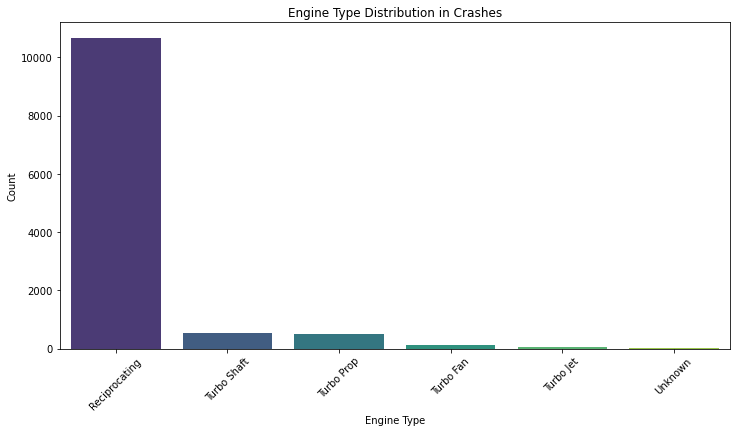

In [277]:
# Engine Type Distribution in Crashes
plt.figure(figsize=(12, 6))
sns.countplot(data=Aviation_df_cleaned, x='Engine.Type', order=Aviation_df_cleaned['Engine.Type'].value_counts().index, palette='viridis')
plt.title('Engine Type Distribution in Crashes')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



## Findings

1. **Injury Severity by Flight Phase**
   - The most dangerous phases of flight are **maneuvering and cruising**, which account for the highest number of fatal and serious injuries.
   - While **landing accidents** are less frequent, when they occur, the outcome can still be severe.

2. **Engine Type Involvement**
   - **Reciprocating engines** are linked to the largest share of crash incidents.
   - **Turbofan and turbojet engines** are less represented but typically used in higher-capacity or better-maintained aircraft.

3. **Aircraft Damage Trends**
   - A significant portion of crashes result in **substantial or total destruction** of the aircraft.
   - Very few incidents result in only minor damage, showing that even small failures can escalate quickly.

4. **Fatalities by manufacturers**
   - The highest fatalities recorded are from ***CESSNA** manufactured aircrafts.

## Recommendations

1. **Invest in Reliable Engine Types**
   - Favor **turbofan or turbine-powered aircraft** for both commercial and private operations.

2. **Strengthen Pilot Preparedness**
   - Focus training efforts on **crusing and maneuvering**, which pose the highest risk.
   - Consider aircraft with **automated crusing and maneuvering aids** and better situational awareness tools.

3. **Select Proven Makes and Models**
   - Use crash history data to guide investment toward **manufacturers and models with fewer fatal outcomes**.
   - Include **weather resilience** as a factor in model evaluation.

4. **Adopt Proactive Maintenance Standards**
   - Many aircraft failures are preventable. Implement **routine inspection schedules** and invest in real-time **monitoring systems**.

# Conclusion

The project provides actionable insights that will guide the aviation division make strategic purchasing decisions by selecting safer and more reliable aircrafts that will give the company a soft landing in their quest to diversify their porfolio.

By making this informed decision,the company will enjoy operational excellence,customer trust and a successful entry into the aviation sector.